In [14]:
import numpy as np
import matplotlib.pyplot as plt
import Paper_equations
import importlib

# import library with equations
importlib.reload(Paper_equations)


<module 'Paper_equations' from 'c:\\Users\\User\\Desktop\\ASKISIS\\Thesis\\PlasmaPhy\\Eq-of-motion\\Paper_equations.py'>

In [15]:

# Initial conditions for y0
initial_J = 0
initial_psi = 0.12
initial_P_J = -0.0272
initial_theta = 0

# Initial conditions for the odeint
t0 = 0
y0 = np.array([initial_P_J, initial_psi, initial_J, initial_theta])
tf = 1000  # Final time
h = 0.005  # Step size

# Parameters
m = 10 ** (-6)   # magnetic moment
q_0 = 1.1        # safety factor - q-profile
q_wall = 3.5     # safety factor on the wall
n = 2            # Parameter for the hypegeometric function


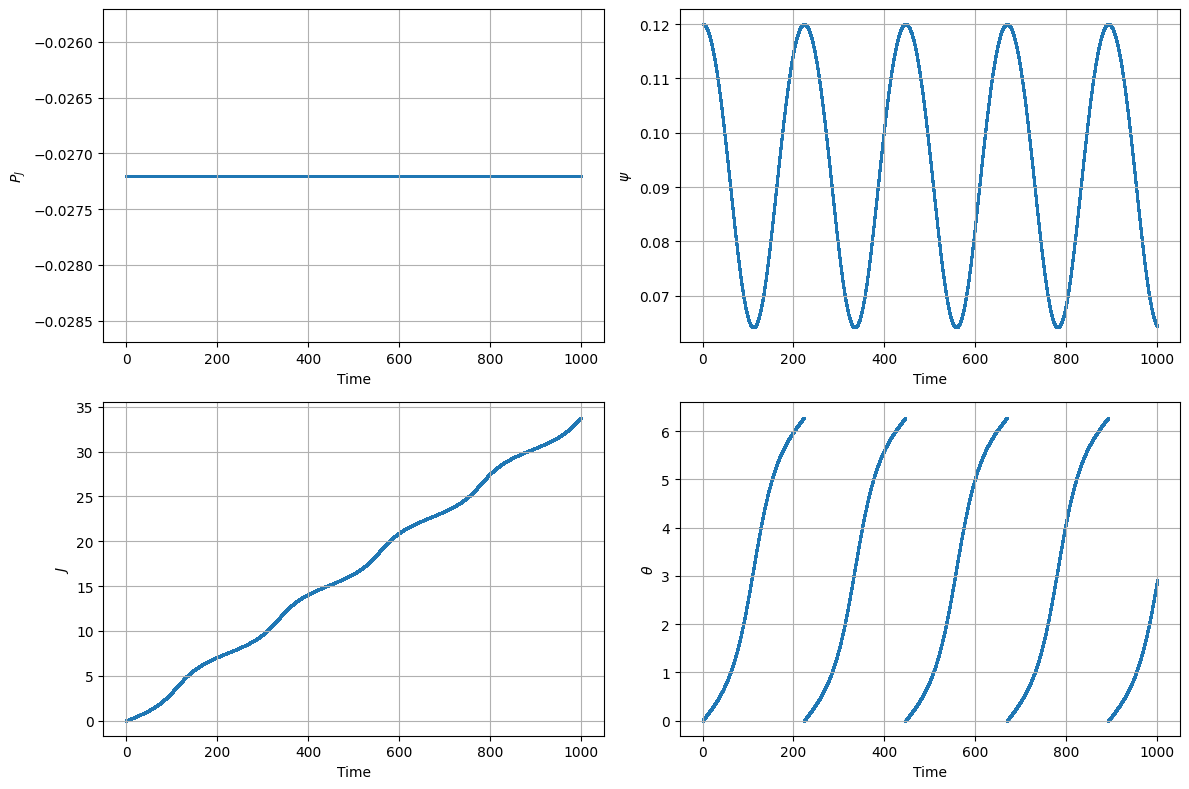

In [16]:

# Solve the differential equations
t_values = np.linspace(t0, tf, int(tf / h) + 1)
y_values = Paper_equations.solve_with_odeint(Paper_equations.paper_differential_equations, t0, y0, tf, h, m, q_wall, q_0, n)

# Extracting individual components
P_J_values = y_values[:, 0]
psi_values = y_values[:, 1]
J_values = y_values[:, 2]
theta_values = y_values[:, 3]
theta_values = np.mod(theta_values, 2*np.pi)

# Create subplots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(t_values, P_J_values, s=0.5)
plt.xlabel('Time')
plt.ylabel('$P_J$')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(t_values, psi_values, s=0.5)
plt.xlabel('Time')
plt.ylabel('$\\psi$')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(t_values, J_values, s=0.5)
plt.xlabel('Time')
plt.ylabel('$J$')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(t_values, theta_values, s=0.5)
plt.xlabel('Time')
plt.ylabel('$\\theta$')
plt.grid(True)

plt.tight_layout()
plt.show()


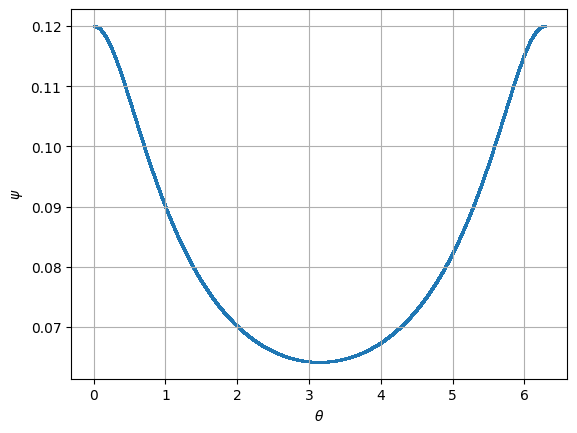

In [17]:
plt.scatter(theta_values, psi_values, s=0.5)
plt.xlabel('$\\theta$')
plt.ylabel('$\\psi$')
plt.grid(True)
plt.show()

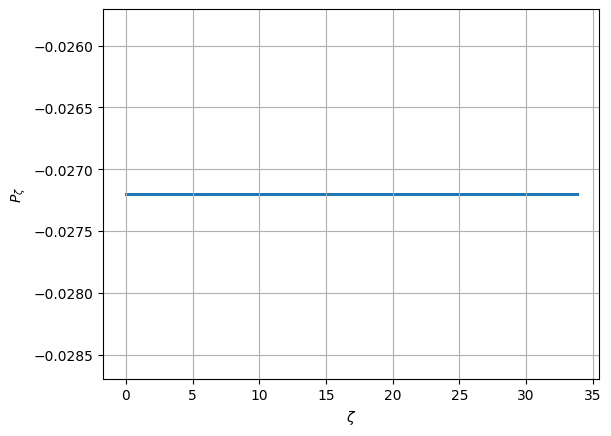

In [18]:
plt.scatter(J_values, P_J_values, s=0.5)
plt.xlabel('$\\zeta$')
plt.ylabel('$P_{\\zeta}$')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18144\2084725444.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = plt.contourf(theta, psi, W, levels=levels, cmap = plt.cm.get_cmap('viridis').reversed())


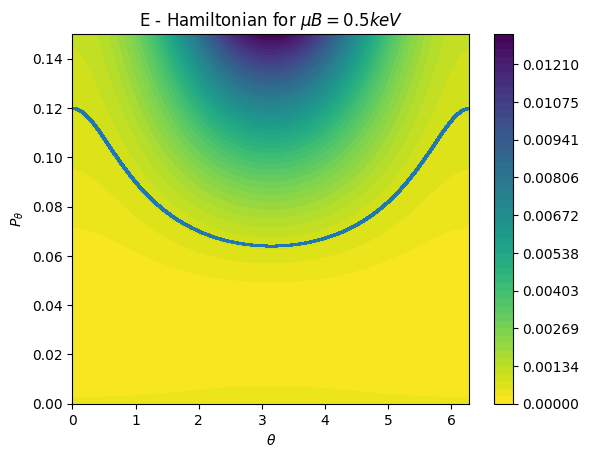

In [19]:
# Generating mesh for the Hamiltonian contour3D plots
theta_vals = np.linspace(0, 2*np.pi, 100)
psi_vals = np.linspace(0.0, 0.15, 100)
theta, psi = np.meshgrid(theta_vals, psi_vals)

# For the calculation of ψ_p we used th hypergeometric function from the library
psi_p = psi/q_0*Paper_equations.calc_hyp2f1(psi, q_0, q_wall, 2).astype(np.float64)

# Hamiltonian of a particle with energy W
W = (initial_P_J + psi_p)**2*((1-np.sqrt(2*psi)*np.cos(theta)))**2/2 + m*(1-np.sqrt(2*psi)*np.cos(theta))

# Creating a contour plot with specified levels
levels = np.linspace(np.min(W), np.max(W), 50)
contour = plt.contourf(theta, psi, W, levels=levels, cmap = plt.cm.get_cmap('viridis').reversed())
plt.colorbar()
plt.scatter(theta_values, psi_values, s=0.5)

plt.xlabel('$\\theta$')
# plt.ylim(0,3)
# plt.xlim(0,3)
plt.ylabel('$P_{\\theta}$')
plt.title('E - Hamiltonian for $\\mu B = 0.5 keV$')

plt.show()